# **Online Shoppers Purchasing Intention**

## **Project Overview**

**This project studies how people behave on an online shopping website and predicts whether a visitor will buy a product or not. We use customer activity data to understand what actions lead to a purchase. The data is cleaned, explored, and prepared so it can be used to train machine learning models. The final goal is to create a dataset that helps build accurate models to predict customer purchasing behavior.**

**Source Link** : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

### **Load Dataset**

In [2]:
df = pd.read_csv("dataset.csv")

### **Check Dataset**

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Rows and columns
print("Shape:", df.shape)

Shape: (12330, 18)


### **Overview of Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Descriptive Statistics of Numerical Attributes
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### **Missing Values check**

In [7]:
# Missing values per column
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


There is no missing values in the dataset

### **Duplicate Values Check**

In [8]:
# Duplicate rows in Dataset
dups = df.duplicated().sum()
print("Duplicate rows:", dups)
if dups > 0:
    df = df.drop_duplicates()
    print("Shape after dropping duplicates:", df.shape)

Duplicate rows: 125
Shape after dropping duplicates: (12205, 18)


### **Encoding**

In [9]:
le_month = LabelEncoder()
le_visitor = LabelEncoder()
le_revenue = LabelEncoder()
df['Month'] = le_month.fit_transform(df['Month'])
df['VisitorType'] = le_visitor.fit_transform(df['VisitorType'])
df['Revenue'] = le_revenue.fit_transform(df['Revenue'])

### **Target Column - Revenue**

In [10]:
X = df.drop("Revenue", axis=1)
y = df["Revenue"]

### **Visualization**

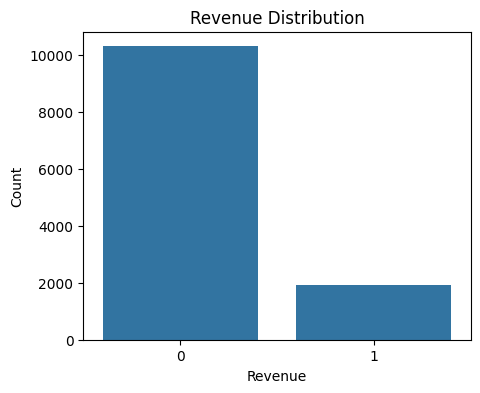

In [11]:
# Bar plot of target distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df['Revenue'])
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

### **Numerical Features**
This section shows how the numerical values are spread, helping us understand the data and detect patterns.

Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Revenue']


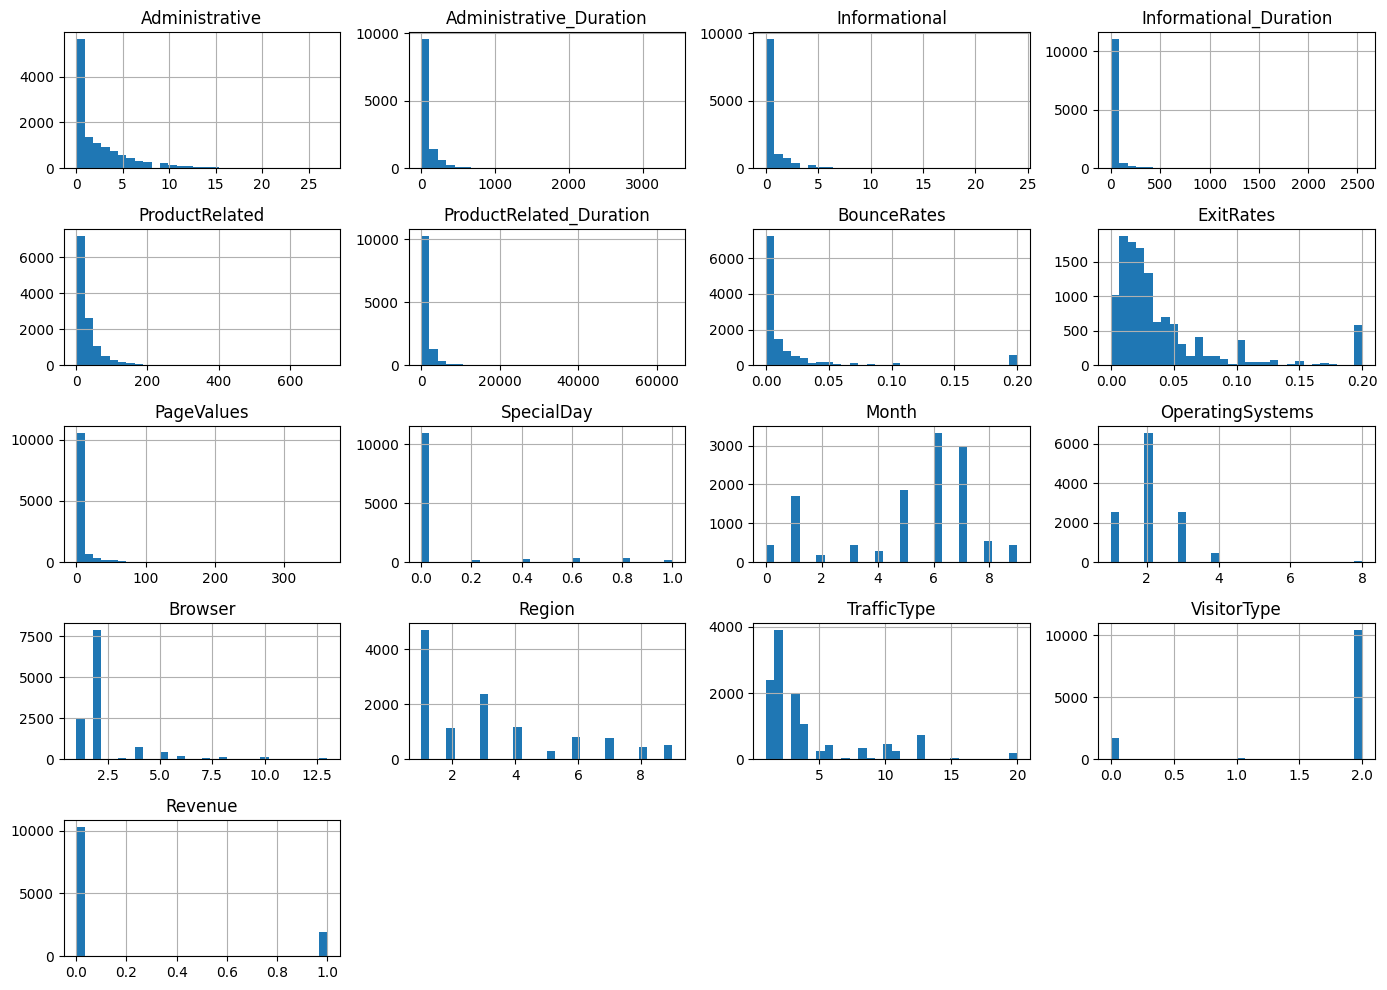

In [12]:
# Numerical Feature
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(num_cols))
df[num_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

### **Outlier Detection**
Outliers are extreme values that can affect model performance. We use visualtools to identify them.

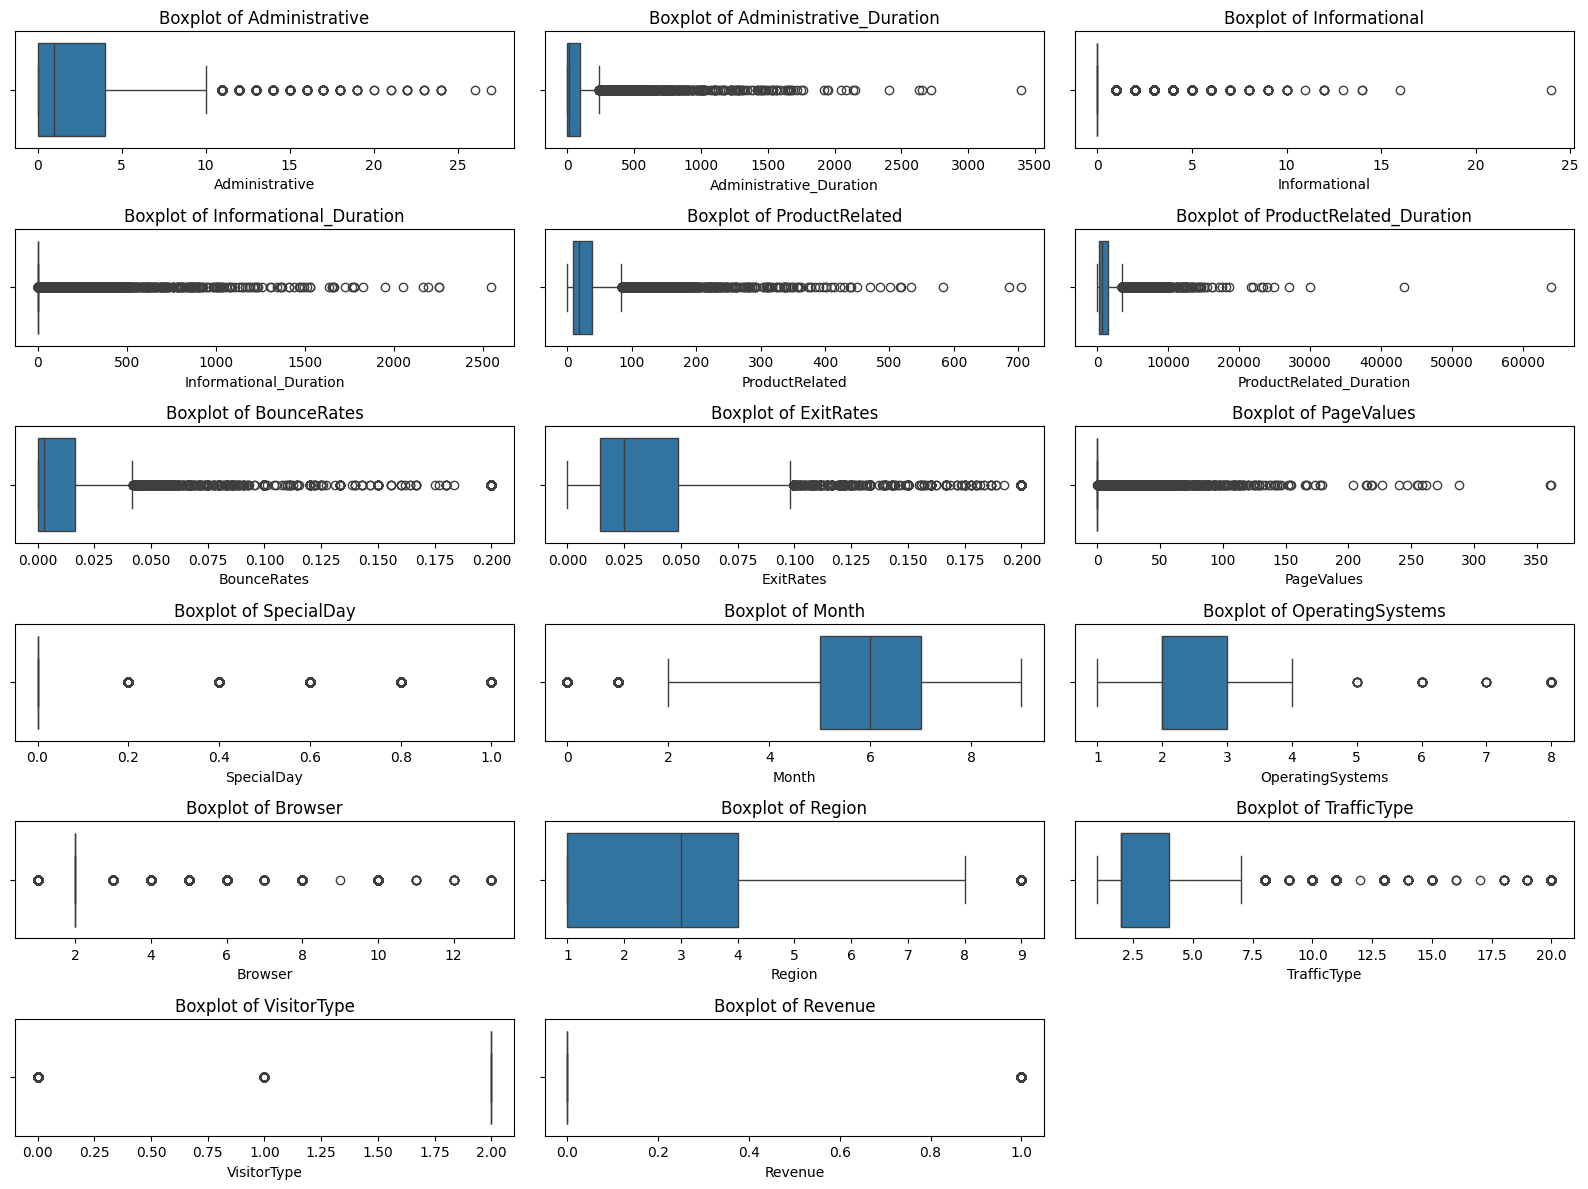

In [13]:
# Boxplots for all numerical columns to identify outliers
plt.figure(figsize=(16, 12))
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### **Correlation**
We use a correlation heatmap to understand how numerical features are related to each other.  
This helps in identifying strong relationships that may be useful for prediction.

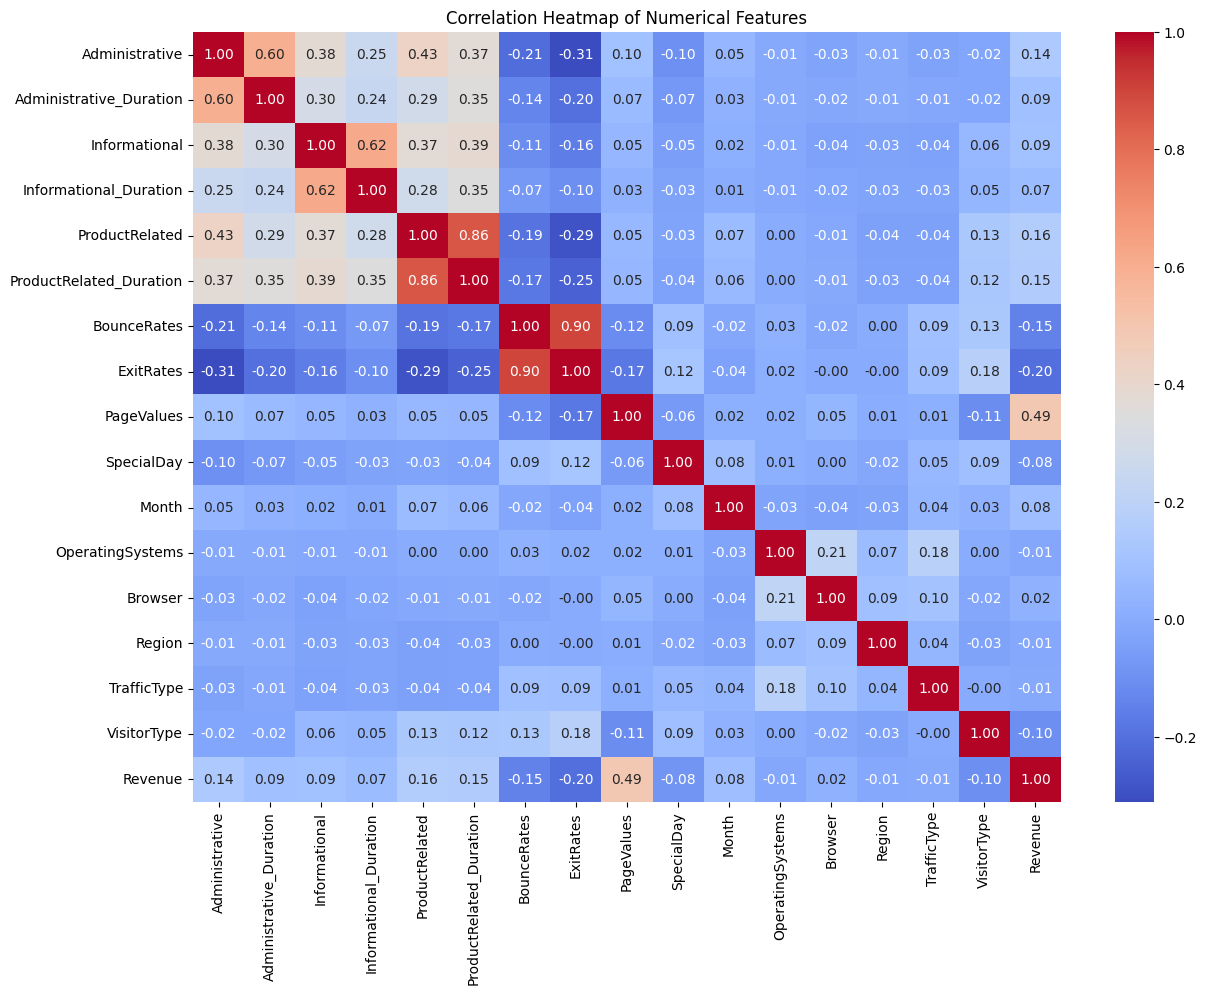

In [14]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm",annot=True,fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### **Feature Scaling**

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### **Train Test Split**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Train Individual Models**

In [17]:
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

Logistic Regression Accuracy: 0.8877509217533798
Random Forest Accuracy: 0.9041376485047112
KNN Accuracy: 0.8775092175337976


### **Stacking Model**

In [18]:
base_models = [('lr', LogisticRegression(max_iter=1000)), ('rf', RandomForestClassifier(n_estimators=100, random_state=42)), ('knn', KNeighborsClassifier(n_neighbors=5))]
meta_model = LogisticRegression()
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stack_pred))

Stacking Model Accuracy: 0.9070053256861942


### **Classification Report**

In [19]:
print("\nClassification Report for Stacking Model:\n")
print(classification_report(y_test, stack_pred))


Classification Report for Stacking Model:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2079
           1       0.76      0.55      0.64       362

    accuracy                           0.91      2441
   macro avg       0.84      0.76      0.79      2441
weighted avg       0.90      0.91      0.90      2441



### **Confusion Matrix**

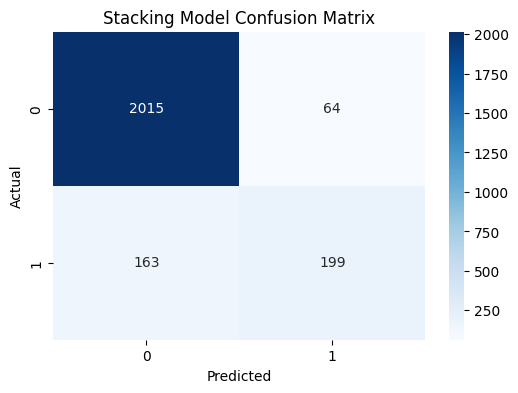

In [20]:
cm = confusion_matrix(y_test, stack_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Stacking Model Confusion Matrix")
plt.show()

In [21]:
import pickle
pickle.dump(stack_model, open("rf_model.pkl","wb"))
pickle.dump(scaler, open("scaler.pkl","wb"))
pickle.dump(le_month, open("le_month.pkl","wb"))
pickle.dump(le_visitor, open("le_visitor.pkl","wb"))
pickle.dump(le_revenue, open("le_revenue.pkl","wb"))
print("All model files saved")

All model files saved


## **Conclusion**

**This project successfully demonstrates the effective application of machine learning techniques to solve the defined problem in a structured and efficient manner. The workflow involved thorough data preprocessing, meaningful feature selection, model training, and evaluation using appropriate performance metrics, ensuring reliable and accurate results.**

**The experimental results indicate that the developed model performs well and meets the project objectives, highlighting the importance of data quality and algorithm selection in machine learning systems. The project also provided practical exposure to real-world challenges such as handling data inconsistencies and optimizing model performance.**

**In conclusion, this work validates the usefulness of machine learning in real-time problem solving. The system can be further enhanced by incorporating larger datasets, advanced algorithms, and deployment in a production environment, making it scalable and more robust for future applications.**